In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import plotly.graph_objects as go

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


from scipy import stats
import statsmodels.formula.api as smf
import ast
from datetime import datetime

import dash
from dash import dcc, html
from dash.dependencies import Input, Output



data_path = './data/'
cmu_character = pd.read_csv(data_path+'cmu_character.csv')

ethnicity_map = pd.read_table(data_path+'ethnicities_data.tsv', sep='\t', index_col=0).to_dict()['Ethnicities']
cmu_character['actor_ethnicity'] = cmu_character['actor_ethnicity'].map(ethnicity_map)
ethnicity_map = pd.read_table(data_path+'ethnicity_group_data.tsv', sep='\t', index_col=0).to_dict()['Ethnic Group']
cmu_character['actor_ethnicity'] = cmu_character['actor_ethnicity'].map(ethnicity_map)


In [115]:
cmu_character

,wikiID,freebase_movID,character_name,actor_birth,actor_gender,actor_height,actor_ethnicity,actor_name,actor_age_at_release,freebase_char_actor_map,freebase_charID,freebase_actorID,release_date,is_principal,persona,fameScore_before,fameScore_after,fameScore_diff
0,975900,/m/03vyhn,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7,2001-08-24,0.0,NaN,11.112213,11.575444,0.463231
1,975900,/m/03vyhn,Lieutenant Melanie Ballard,1974-08-15,F,1.780,NaN,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4,2001-08-24,0.0,35.0,22.125281,22.122250,-0.003031
2,975900,/m/03vyhn,Desolation Williams,1969-06-15,M,1.727,"Black, Caribbean or African",Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l,2001-08-24,1.0,NaN,33.033075,33.028550,-0.004525
3,975900,/m/03vyhn,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc,2001-08-24,1.0,NaN,88.360114,88.348011,-0.012103
4,975900,/m/03vyhn,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg,2001-08-24,0.0,NaN,30.626760,30.622565,-0.004195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331131,9971909,/m/02pygw1,NaN,1938-11-26,M,NaN,NaN,Rich Little,33.0,/m/02vbk4r,NaN,/m/03m6t5,1972-09-22,1.0,NaN,1.431091,1.430895,-0.000196
331132,9971909,/m/02pygw1,NaN,1918-10-02,M,NaN,NaN,Herb Voland,53.0,/m/0ggdv2_,NaN,/m/02qylb9,1972-09-22,1.0,NaN,4.172349,4.171777,-0.000572
331133,28308153,/m/0cp05t9,NaN,1941-11-18,M,1.730,White,David Hemmings,15.0,/m/0g8ngmc,NaN,/m/022g44,1957-01-01,1.0,NaN,0.000000,0.802080,0.802080
331134,28308153,/m/0cp05t9,NaN,NaN,NaN,NaN,NaN,Roberta Paterson,NaN,/m/0g8ngmj,NaN,/m/0g8ngmm,1957-01-01,0.0,NaN,0.000000,0.668400,0.668400


In [177]:
# cmu_actors = cmu_character[['freebase_char_actor_map','actor_gender','actor_age_at_release','actor_ethnicity','persona']].copy()
# cmu_actors.dropna(inplace=True)
# cmu_actors.drop(columns=['persona'])

# bins=[0, 40, 60, 80, 100]
# cmu_actors['actor_age_at_release'] = pd.cut(cmu_actors['actor_age_at_release'],bins=bins,labels=bins[:-1])

# # bins = [1.4, 1.6, 1.8, 2]
# # cmu_actors['actor_height'] = pd.cut(cmu_actors['actor_height'],bins=bins,labels=bins[1:])

# cmu_actors = pd.get_dummies(cmu_actors,columns=['actor_gender','actor_ethnicity'])
# cmu_actors.set_index('freebase_char_actor_map', inplace=True)

# cmu_actors.dropna(inplace=True)

# cmu_actors.drop(columns='persona',inplace=True)
# cmu_actors

In [178]:
cplt_character = cmu_character.dropna(subset=['actor_age_at_release','actor_ethnicity','actor_gender','actor_height','persona']).copy()
bins=[0, 40, 60, 80, 100]
Ages = ['0-40','41-60','61-80','81-100']
cplt_character['actor_age_gr_at_release'] = pd.cut(cplt_character['actor_age_at_release'],bins=bins,labels=Ages)

# # bins = [1.4, 1.6, 1.8, 2]
# cmu_actors['actor_height'] = pd.cut(cmu_actors['actor_height'],bins=bins,labels=bins[1:])
bins = [1.4, 1.6, 1.8, 2]
Heights= ['1.4-1.6','1.61-1.8','1.81-2.00']
cplt_character['actor_height_gr'] = pd.cut(cplt_character['actor_height'],bins=bins,labels=Heights)

cplt_character['group'] = cplt_character.groupby(by=['actor_age_gr_at_release','actor_ethnicity','actor_gender']).ngroup()
cplt_character

,wikiID,freebase_movID,character_name,actor_birth,actor_gender,actor_height,actor_ethnicity,actor_name,actor_age_at_release,freebase_char_actor_map,...,freebase_actorID,release_date,is_principal,persona,fameScore_before,fameScore_after,fameScore_diff,actor_age_gr_at_release,actor_height_gr,group
66,156558,/m/014k4y,Yvette,1970-09-11,F,1.650,"Black, Caribbean or African",Taraji P. Henson,30.0,/m/0jtx5t,...,/m/0blbxk,2001-06-27,0.0,46.0,1.945623,8.024791,6.079167,0-40,1.61-1.8,2.0
67,156558,/m/014k4y,Jody,1978-12-30,M,1.797,"Black, Caribbean or African",Tyrese Gibson,22.0,/m/0jtx5h,...,/m/01l1b90,2001-06-27,1.0,4.0,0.000000,9.629749,9.629749,0-40,1.61-1.8,3.0
85,156558,/m/014k4y,Rodney,1971-10-20,M,1.918,"Black, Caribbean or African",Snoop Dogg,29.0,/m/0jtx5n,...,/m/01vw8mh,2001-06-27,0.0,41.0,14.648641,14.646634,-0.002007,0-40,1.81-2.00,3.0
98,156558,/m/014k4y,Melvin,1959-05-12,M,1.830,"Black, Caribbean or African",Ving Rhames,42.0,/m/03jnxct,...,/m/032zg9,2001-06-27,0.0,35.0,97.306857,97.293528,-0.013329,41-60,1.81-2.00,11.0
102,156558,/m/014k4y,Sweetpea,1976-10-19,M,1.829,"Black, Caribbean or African",Omar Gooding,24.0,/m/03jnxn4,...,/m/05cgxx,2001-06-27,1.0,40.0,0.907537,9.629749,8.722211,0-40,1.81-2.00,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331070,6456053,/m/0g605h,Paolo Maltese,1927-10-18,M,1.850,White,George C. Scott,37.0,/m/04p4q_p,...,/m/0l786,1964-12-31,0.0,40.0,107.324441,107.309740,-0.014701,0-40,1.81-2.00,7.0
331076,6456053,/m/0g605h,Joey Friedlander,1918-11-04,M,1.770,White,Art Carney,46.0,/m/0cg660g,...,/m/015qt5,1964-12-31,0.0,40.0,0.000000,6.228965,6.228965,41-60,1.61-1.8,15.0
331083,22330502,/m/05sync6,Yvonne Valbret,1905-09-18,F,1.702,White,Greta Garbo,25.0,/m/05tg4vb,...,/m/0h14h,1931-01-31,0.0,49.0,16.033225,16.031029,-0.002196,0-40,1.61-1.8,6.0
331097,24997872,/m/09g6klx,Raja,1951-09-07,M,1.780,"Asian, Middle East and Tribes",Mammootty,58.0,/m/0gvytkx,...,/m/02hkv5,2010-05-07,1.0,40.0,5.078524,5.077828,-0.000696,41-60,1.61-1.8,9.0


In [179]:
Genders = cplt_character['actor_gender'].unique()
Ethnis = cplt_character['actor_ethnicity'].unique()

In [180]:
def find_group(gender,ethni,age):
# gender = 'F'
# ethni = "Black, Caribbean or African"
# age = "0-40"

    return cplt_character[(cplt_character['actor_gender'] == gender) & 
                (cplt_character['actor_age_gr_at_release'] == age) & 
                (cplt_character['actor_ethnicity'] == ethni)]['group'].unique()[0]

In [181]:
def plotall(cluster):
    test = cplt_character[cplt_character['group'] == cluster]
    test = test.dropna(subset=['persona']).copy()
    test['persona'] = test['persona'].astype(int)

    test = test[['freebase_char_actor_map', 'fameScore_diff', 'persona']]

    formula = 'fameScore_diff ~ C(persona)'

    mod = smf.ols(formula=formula, data=test)
    res = mod.fit()

    # Create a vertical bar plot using plotly.graph_objs
    fig = go.Figure()
    fig.add_trace(go.Bar(
        x=res.params.index[1:],
        y=res.params.values[1:],
        marker_color=['cornflowerblue' if p < 0.1 else 'tomato' for p in res.pvalues],
        marker=dict(line=dict(width=2)),  # Adjust the width of the bar lines
        name=''
    ))

    fig.update_layout(
        title='Regression coefficients',
        xaxis=dict(title='Features'),
        yaxis=dict(title='Coefficients'),
        legend=dict(orientation='v', yanchor='middle', xanchor='right', traceorder='reversed', itemsizing='constant'),
        showlegend=True,
        height=500  # Adjust the height of the entire plot
    )

    # Add legend
    fig.add_trace(go.Bar(x=[None], y=[None], marker_color='cornflowerblue', name='p < 0.05 (significant)'))
    fig.add_trace(go.Bar(x=[None], y=[None], marker_color='tomato', name='p >= 0.05 (not significant)'))

    return fig

In [182]:
# # Example usage:
# cluster_number = 0
# fig = plotall(cluster_number)
# fig.show()

In [198]:
# Dash app
app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("Interactive Regression Coefficients Plot"),
    html.Div([
    # Dropdown to select cluster
    dcc.Dropdown(
        id='gender-selection',
        options=[
            {'label': str(gender), 'value': gender}
            for gender in Genders
        ],
        value=Genders[0],  # Set default value
        style={'width': '300px'}
    )], style={'display': 'inline-block', 'margin-right': '20px'}),

    html.Div([
    dcc.Dropdown(
        id='ethni-selection',
        options=[
            {'label': str(ethni), 'value': ethni}
            for ethni in Ethnis
        ],
        value=Ethnis[0],  # Set default value
        style={'width': '300px'}
    )], style={'display': 'inline-block', 'margin-right': '20px'}),

    html.Div([
    dcc.Dropdown(
        id='age-selection',
        options=[
            {'label': str(age), 'value': age}
            for age in Ages
        ],
        value=Ages[0],  # Set default value
        style={'width': '300px'}
    )], style={'display': 'inline-block', 'margin-right': '20px'}),
    
    # Graph to display coefficients
    dcc.Graph(id='coefficients-graph')
])

# Callback to update graph based on cluster selection
@app.callback(
    Output('coefficients-graph', 'figure'),
    [Input('gender-selection', 'value'),
     Input('ethni-selection', 'value'),
     Input('age-selection', 'value')]
)
def update_graph(gender,ethni,age):
    cluster = cplt_character[(cplt_character['actor_gender'] == gender) & 
                (cplt_character['actor_age_gr_at_release'] == age) & 
                (cplt_character['actor_ethnicity'] == ethni)]['group'].unique()[0]
    return plotall(cluster)

if __name__ == '__main__':
    app.run_server(debug=True, port=8051)


In [ ]:
# # Generate the HTML string manually
# html_string = '''
# <!DOCTYPE html>
# <html>
# <head>
#     <meta charset="utf-8">
#     <title>Dash App</title>
#     <!-- Include Dash CSS and JavaScript -->
#     <link rel="stylesheet" href="https://codepen.io/chriddyp/pen/bWLwgP.css">
#     <script src="https://code.jquery.com/jquery-3.5.1.min.js"></script>
#     <script src="https://cdn.plot.ly/plotly-latest.min.js"></script>
#     <script src="https://cdn.jsdelivr.net/npm/dash@2.0.0/dist/dash.dev.min.js"></script>
# </head>
# <body>
#     <!-- Include the app layout -->
#     {}
# </body>
# </html>
# '''.format(app.layout)

# # Save the HTML string to a file
# with open("dash_app.html", "w") as file:
#     file.write(html_string)

In [184]:
# cmu_actors[cmu_actors['actor_age_at_release']==0]['cluster'].unique()

In [123]:
# cmu_actors[cmu_actors['actor_age_at_release']==80]['cluster'].unique()

In [124]:
# cmu_character_gender = cmu_character.dropna(subset='actor_gender').copy()
cmu_character_male = cmu_character.query("actor_gender == 'M'").copy()
cmu_character_female = cmu_character.query("actor_gender == 'F'").copy()
# cmu_character.groupby("freebase_actorID").apply(lambda x: x.iloc[0])

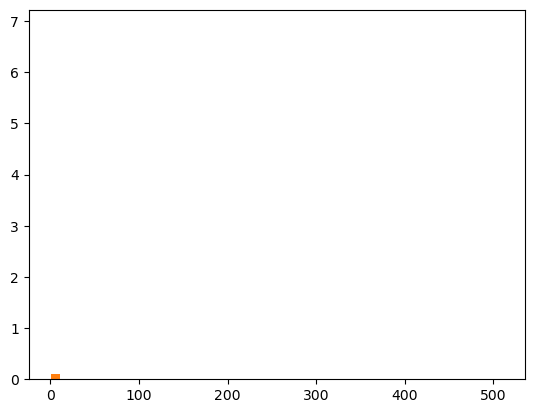

In [125]:
plt.hist(cmu_character_female['actor_height'],bins=50,density=True)
plt.hist(cmu_character_male['actor_height'],bins=50,density=True)
plt.show()

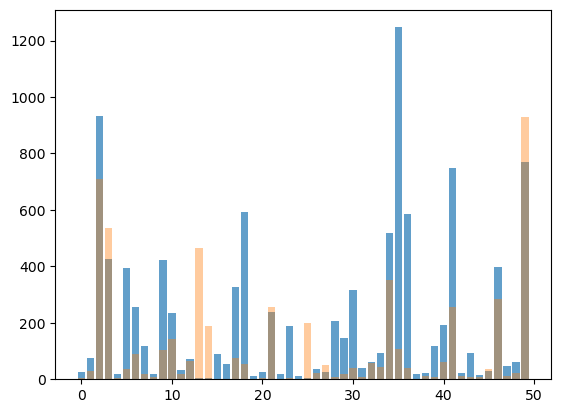

In [126]:
female_persona_count = cmu_character_female[['actor_ethnicity','persona']]\
                  .groupby('persona',as_index=False).count().rename(columns={'actor_ethnicity':'count'})
female_persona_count.sort_values('count',inplace=True,ascending=False)

male_persona_count = cmu_character_male[['actor_ethnicity','persona']]\
                  .groupby('persona',as_index=False).count().rename(columns={'actor_ethnicity':'count'})
male_persona_count.sort_values('count',inplace=True,ascending=False)

plt.bar(male_persona_count['persona'],male_persona_count['count'],alpha=0.7)
plt.bar(female_persona_count['persona'],female_persona_count['count'],alpha=0.4)
plt.show()

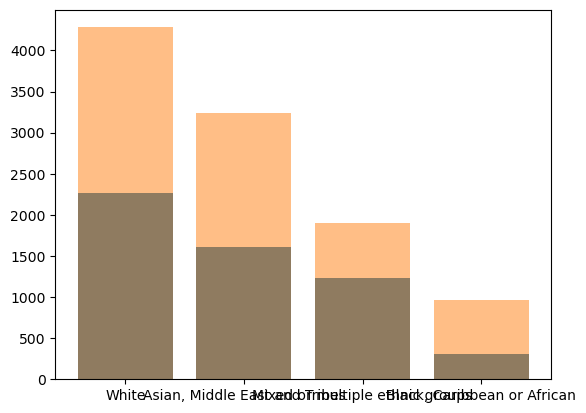

In [127]:
female_ethnicity_count = cmu_character_female[['actor_ethnicity','persona']]\
                  .groupby('actor_ethnicity',as_index=False).count().rename(columns={'persona':'count'})
female_ethnicity_count.sort_values('count',inplace=True,ascending=False)

male_ethnicity_count = cmu_character_male[['actor_ethnicity','persona']]\
                  .groupby('actor_ethnicity',as_index=False).count().rename(columns={'persona':'count'})
male_ethnicity_count.sort_values('count',inplace=True,ascending=False)


plt.bar(female_ethnicity_count['actor_ethnicity'],female_ethnicity_count['count'],alpha=1)
plt.bar(male_ethnicity_count['actor_ethnicity'],male_ethnicity_count['count'],alpha=0.5)
plt.show()